In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium 
from folium.plugins import MarkerCluster
!pip install seaborn
!pip install plotly
!pip install folium

In [11]:
# 1. Read the dataset
url = 'https://datos.cdmx.gob.mx/dataset/12d22477-bcf1-49ee-92aa-16a0d0a5817c/' + \
      'resource/3f308147-b1fc-49a9-92b7-e74f3f79aa9c/download/' + \
      'carpetas-de-investigacion-pgj-cdmx.csv'
df = pd.read_csv(url)

In [12]:
# 2. View the basic data structure and dimensions 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    808871 non-null  int64  
 1   ao_hechos             808673 non-null  float64
 2   mes_hechos            808673 non-null  object 
 3   fecha_hechos          808673 non-null  object 
 4   delito                808871 non-null  object 
 5   categoria_delito      808871 non-null  object 
 6   fiscalia              808871 non-null  object 
 7   agencia               808871 non-null  object 
 8   unidad_investigacion  808646 non-null  object 
 9   colonia_hechos        776781 non-null  object 
 10  alcaldia_hechos       807860 non-null  object 
 11  fecha_inicio          808871 non-null  object 
 12  mes_inicio            808871 non-null  object 
 13  ao_inicio             808871 non-null  int64  
 14  calle_hechos          806467 non-null  object 
 15  

In [13]:
# 3. Display some observations
df.head(10)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
5,5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"
6,6,2018.0,Mayo,2018-05-22 06:20:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,TLACOQUEMECATL,BENITO JUAREZ,2018-05-22 11:09:00,Mayo,2018,AV. DE LOS INSURGENTES SUR,NaN,-99.177100,19.379581,"19.3795809108,-99.1771001785"
7,7,2016.0,Enero,2016-01-02 21:20:00,ROBO DE DINERO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTACALCO,IZC-1,UI-1CD,LOS REYES,IZTACALCO,2016-01-05 19:37:09,Enero,2016,AV PLUTARCO ELIAS CALLES,MIRAFUENTES,-99.117183,19.398040,"19.3980399998,-99.117183"
8,8,2017.0,Noviembre,2017-11-01 17:15:00,LESIONES INTENCIONALES,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMZV,UI-1CD,CENTRO,CUAUHTEMOC,2017-11-01 18:48:18,Noviembre,2017,PLAZA DE LA CONSTITUCION,PINO SUAREZ,-99.132449,19.431791,"19.4317911274,-99.1324494018"
9,9,2016.0,Septiembre,2016-09-23 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-3,UI-1SD,LA PRADERA,GUSTAVO A MADERO,2018-05-22 11:40:31,Mayo,2018,FRANCISCO MORAZAN,NaN,-99.071243,19.475715,"19.4757145711,-99.0712426634"


In [14]:
# We want only the mayors from Ciudad de Mexico
alcaldia = df["alcaldia_hechos"].nunique()
#'ALVARO OBREGON''AZCAPOTZALCO''BENITO JUAREZ''COYOACAN''CUAJIMALPA DE MORELOS''CUAUHTEMOC''GUSTAVO A MADERO''IZTACALCO''IZTAPALAPA''LA MAGDALENA CONTRERAS''MIGUEL HIDALGO''MILPA ALTA''TLAHUAC''TLALPAN''VENUSTIANO CARRANZA''XOCHIMILCO'
alcaldia

485

In [42]:
df[df["alcaldia_hechos"].isin(['ALVARO OBREGON','AZCAPOTZALCO','BENITO JUAREZ','COYOACAN','CUAJIMALPA DE MORELOS','CUAUHTEMOC','GUSTAVO A MADERO','IZTACALCO','IZTAPALAPA','LA MAGDALENA CONTRERAS','MIGUEL HIDALGO','MILPA ALTA','TLAHUAC','TLALPAN','VENUSTIANO CARRANZA','XOCHIMILCO'])]


,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
fecha_hechos,,,,,,,,,,,,,,,,,,,
2016-01-05 17:00:00,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
2017-11-01 16:40:00,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
2016-01-05 21:12:42,3,2016.0,Diciembre,2016-01-05 21:12:42,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
2018-05-16 16:00:00,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
2018-05-21 20:40:00,5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-09 22:30:00,808866,2018.0,Julio,2018-07-09 22:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-1,UI-1SD,ANAHUAC,MIGUEL HIDALGO,2018-07-10 18:24:33,Julio,2018,LAGO ALBERTO,LAGO ITZEO,-99.182018,19.439418,"19.439418014,-99.1820184667"
2018-07-29 05:00:00,808867,2018.0,Julio,2018-07-29 05:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MILPA ALTA,MIL-2,UI-1CD,SANTA CRUZ XOCHITEPEC,XOCHIMILCO,2018-07-29 12:37:27,Julio,2018,CALLEJON MORELOS,NaN,-99.134738,19.254935,"19.2549354998,-99.1347381"
2019-02-14 19:00:00,808868,2019.0,Febrero,2019-02-14 19:00:00,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÓN EN MIGUEL HIDALGO,H1,UI-1SD,INDUSTRIAL,GUSTAVO A MADERO,2019-02-15 12:50:00,Febrero,2019,CALZ. DE LOS MISTERIOS,NaN,-99.122943,19.473867,"19.473866796,-99.1229431996"


In [43]:
# Convert the values to the right type

In [44]:
df["fecha_hechos"] = df["fecha_hechos"].astype("datetime64")
df["fecha_inicio"] = df["fecha_inicio"].astype("datetime64")
#df["ao_hechos"] = df["ao_hechos"].astype("int")
df["delito"] = pd.Categorical(df["delito"])
df["categoria_delito"] = pd.Categorical(df["categoria_delito"])
df["mes_inicio"] = pd.Categorical(df["mes_inicio"])
df["mes_hechos"] = pd.Categorical(df["mes_hechos"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 808871 entries, 2016-01-05 17:00:00 to 2017-04-01 10:00:00
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    808871 non-null  int64         
 1   ao_hechos             808871 non-null  float64       
 2   mes_hechos            808871 non-null  category      
 3   fecha_hechos          808871 non-null  datetime64[ns]
 4   delito                808871 non-null  category      
 5   categoria_delito      808871 non-null  category      
 6   fiscalia              808871 non-null  object        
 7   agencia               808871 non-null  object        
 8   unidad_investigacion  808646 non-null  object        
 9   colonia_hechos        776781 non-null  object        
 10  alcaldia_hechos       807860 non-null  object        
 11  fecha_inicio          808871 non-null  datetime64[ns]
 12  mes_inicio            80

In [45]:
# Summarise the data, including dates
df.describe(datetime_is_numeric=True)

,id,ao_hechos,fecha_hechos,fecha_inicio,ao_inicio,longitud,latitud
count,808871.000000,808871.000000,808871,808871,808871.000000,777536.000000,777536.000000
mean,404435.000000,2017.332549,2017-10-18 14:43:09.182903040,2017-11-08 18:40:05.927461120,2017.385776,-99.137481,19.388497
min,0.000000,2016.000000,2016-01-01 00:00:00,2016-01-01 01:35:06,2016.000000,-99.342765,9.486549
25%,202217.500000,2016.000000,2016-12-12 17:00:00,2017-01-09 19:49:20,2017.000000,-99.174906,19.342264
50%,404435.000000,2017.000000,2017-11-02 10:30:00,2017-11-27 13:51:10,2017.000000,-99.142680,19.391685
75%,606652.500000,2018.000000,2018-08-27 22:00:00,2018-09-19 15:52:30.500000,2018.000000,-99.101420,19.437588
max,808870.000000,2019.000000,2019-06-30 23:22:07,2019-06-30 23:56:29,2019.000000,-98.922660,19.611544
std,233501.089132,1.014641,NaN,NaN,1.020354,0.058754,0.069692


In [46]:
#remplazamos las fechas de hechos por la de inicio cuando es meyor a 2016 o es NA
df["fecha_hechos"] = df["fecha_hechos"].mask((df["fecha_hechos"].dt.year<2016) | (df["fecha_hechos"].isna()), df["fecha_inicio"])
#remplazamos ao_hecho por ao_inicio cuando es mayor a 2016 o NA
df["ao_hechos"] = df["ao_hechos"].mask((df["ao_hechos"]<2016) | (df["ao_hechos"].isna()), df["ao_inicio"])
#remplazamos mes de hecho por mes_inicio cuando es NA
df["mes_hechos"] = df["mes_hechos"].mask(df["mes_hechos"].isna(), df["mes_inicio"])


In [47]:
# How many crimes are recorded in this dataset? In which period?
print(f'There are {len(df)} crimes, from {df["fecha_inicio"].dt.date.min()} to {df["fecha_inicio"].dt.date.max()}')

There are 808871 crimes, from 2016-01-01 to 2019-06-30


In [48]:
df = df.set_index(df["fecha_hechos"])

In [49]:
#df.set_index("fecha_inicio", inplace=True)
#No recomendado

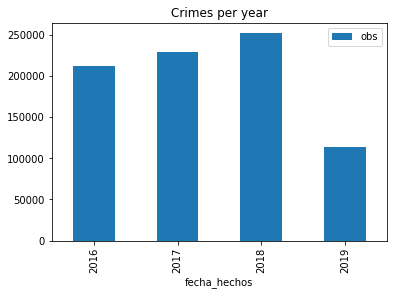

In [23]:
# How many crimes were recorded by year?
df.groupby(df.index.year).size().reset_index(name="obs").plot.bar(x="fecha_hechos", y="obs", title="Crimes per year")
plt.show()

In [50]:
# Show the top 5 crimes
df.groupby("delito").size().reset_index(name="Crimes").sort_values(by="Crimes", ascending=False).head(5)

,delito,Crimes
273,VIOLENCIA FAMILIAR,69517
223,ROBO DE OBJETOS,52214
159,ROBO A NEGOCIO SIN VIOLENCIA,51426
75,FRAUDE,45349
51,DENUNCIA DE HECHOS,44433


In [51]:
df["delito"].value_counts().head(5)

VIOLENCIA FAMILIAR              69517
ROBO DE OBJETOS                 52214
ROBO A NEGOCIO SIN VIOLENCIA    51426
FRAUDE                          45349
DENUNCIA DE HECHOS              44433
Name: delito, dtype: int64

In [52]:
# Calculate the accumulated rate of the top 5 crimes
df.groupby("delito").size().reset_index(name="Crimes").sort_values(by="Crimes", ascending=False).assign(rate=lambda x: x["Crimes"]/sum(x["Crimes"])*100).head(5)
df.groupby("delito").size().reset_index(name="Crimes").sort_values(by="Crimes", ascending=False).assign(rate=lambda x: x["Crimes"]/len(df)*100, accum = lambda x: x["rate"].cumsum()).head(5)

,delito,Crimes,rate,accum
273,VIOLENCIA FAMILIAR,69517,8.594325,8.594325
223,ROBO DE OBJETOS,52214,6.455170,15.049495
159,ROBO A NEGOCIO SIN VIOLENCIA,51426,6.357750,21.407245
75,FRAUDE,45349,5.606456,27.013702
51,DENUNCIA DE HECHOS,44433,5.493212,32.506914


In [53]:
# Which city has the most and the less crimes in the dataset?
#df.groupby('alcaldia_hechos').size().reset_index(name="Crimes").sort_values(by="Crimes", ascending=True)
df.groupby('alcaldia_hechos').size().reset_index(name="Crimes").sort_values(by="Crimes")

,alcaldia_hechos,Crimes
0,ABALA,1
178,HUIMANGUILLO,1
363,TANCITARO,1
361,TAMAZULA DE GORDIANO,1
181,HUIXTLA,1
...,...,...
117,COYOACAN,54235
62,BENITO JUAREZ,70599
164,GUSTAVO A MADERO,80097
196,IZTAPALAPA,119926


In [54]:
df_city = df.groupby('alcaldia_hechos').size().reset_index(name="Crimes").sort_values(by="Crimes")
#df_city["Crimes"]=df_city["Crimes"].map("{:,d}".format)
df_city

,alcaldia_hechos,Crimes
0,ABALA,1
178,HUIMANGUILLO,1
363,TANCITARO,1
361,TAMAZULA DE GORDIANO,1
181,HUIXTLA,1
...,...,...
117,COYOACAN,54235
62,BENITO JUAREZ,70599
164,GUSTAVO A MADERO,80097
196,IZTAPALAPA,119926


In [29]:
# In each city, what are the top 3 subcities ("Colonias") with most crimes?
#df.groupby(["alcaldia_hechos","colonia_hechos"]).size().reset_index(name="Crimes").sort_values(by="Crimes", ascending=True)
df.groupby(["alcaldia_hechos", "colonia_hechos"]).size().to_frame().rename(columns={0:"Crimes"}).sort_values(by=["alcaldia_hechos", "Crimes"], ascending=[True, False]).groupby(level=0).head(3)

Crimes
alcaldia_hechos        colonia_hechos                                           
ALVARO OBREGON         JARDINES DEL PEDREGAL                                2335
                       SAN ANGEL                                            2019
                       ZEDEC SANTA FE                                       1843
AZCAPOTZALCO           EL ROSARIO                                           2820
                       INDUSTRIAL VALLEJO                                   1930
                       CENTRO DE AZCAPOTZALCO                               1796
BENITO JUAREZ          DEL VALLE CENTRO                                    12644
                       NARVARTE                                             9317
                       PORTALES SUR                                         4587
COYOACAN               PEDREGAL DE SANTO DOMINGO                            4434
                       AJUSCO                                               2377
                       DEL CARMEN                                           2348
CUAJIMALPA DE MORELOS  CUAJIMALPA                                           1693
                       LOMAS DE SANTA FE                                    1655
                       SAN JOSÉ DE LOS CEDROS                               1008
CUAUHTEMOC             CENTRO                                              28751
                       DOCTORES                                            16657
                       ROMA NORTE                                          10403
CUERNAVACA             CUERNAVACA CENTRO                                       1
ECATEPEC DE MORELOS    EL CHAMIZAL                                             1
GUSTAVO A MADERO       LINDAVISTA                                           3737
                       GUADALUPE TEPEYAC                                    3208
                       SAN FELIPE DE JESÚS                                  2284
HERMOSILLO             EL SAUCITO - CIUDAD                                     1
IZTACALCO              AGRÍCOLA ORIENTAL                                    6663
                       AGRÍCOLA PANTITLAN                                   5476
                       GRANJAS MÉXICO                                       3604
IZTAPALAPA             CENTRAL DE ABASTO                                    5264
                       LOMAS DE SAN LORENZO                                 3060
                       DESARROLLO URBANO QUETZALCOATL                       2990
LA MAGDALENA CONTRERAS SAN JERÓNIMO LÍDICE                                  1452
                       SAN NICOLÁS TOTOLAPAN                                1008
                       SAN BERNABÉ OCOTEPEC                                  672
MIGUEL HIDALGO         POLANCO                                              7131
                       ANAHUAC                                              3796
                       LOMAS DE CHAPULTEPEC I SECCIÓN                       3196
MILPA ALTA             CRUZTITLA (SAN ANTONIO TECOMITL)                      390
                       SANTA MARTHA (VILLA MILPA ALTA)                       342
                       SAN MIGUEL (SAN PABLO OZTOTEPEC)                      340
NAUCALPAN DE JUAREZ    SAN BARTOLO NAUCALPAN (NAUCALPAN CENTRO) - PUEBLO       2
                       INDUSTRIAL ALCE BLANCO - FRACCIONAMIENTO                1
                       VISTA DEL VALLE II,III,IV,IX - FRACCIONAMIENTO          1
NEZAHUALCOYOTL         METROPOLITANA 2A SECC                                   1
                       METROPOLITANA 3A SECC                                   1
                       REFORMA                                                 1
OAXACA DE JUAREZ       OAXACA CENTRO                                           1
SAN JUAN GUICHICOVI    RAMOS MILLAN - EJIDO                                    1
TLAHUAC                DEL MAR                                              1121
                       M

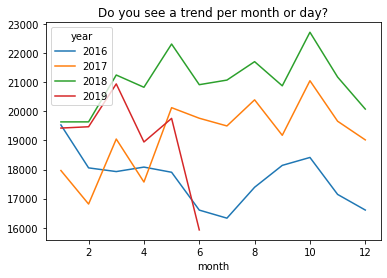

In [55]:
# Do you see a trend per month or day?
df.groupby([df["fecha_hechos"].dt.year.rename("year"), df["fecha_hechos"].dt.month.rename("month")]).size().unstack("year").plot(title="Do you see a trend per month or day?")
plt.show()

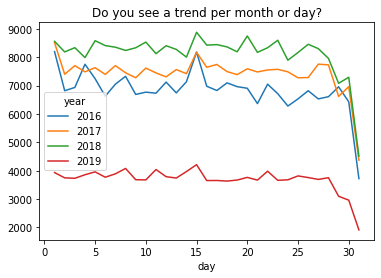

In [31]:
df.groupby([df["fecha_hechos"].dt.year.rename("year"), df["fecha_hechos"].dt.day.rename("day")]).size().unstack("year").plot(title="Do you see a trend per month or day?")
plt.show()

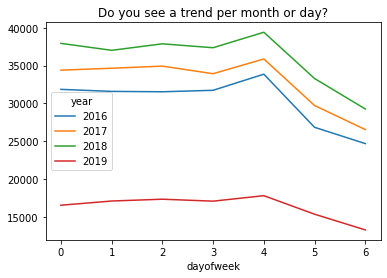

In [56]:
df.groupby([df["fecha_hechos"].dt.year.rename("year"), df["fecha_hechos"].dt.dayofweek.rename("dayofweek")]).size().unstack("year").plot(title="Do you see a trend per month or day?")
plt.show()

/tmp/ipykernel_1968/1752682319.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df.groupby([df["fecha_hechos"].dt.year.rename("year"), df["fecha_hechos"].dt.week.rename("week")]).size().unstack("year").plot(title="Do you see a trend per month or day?")


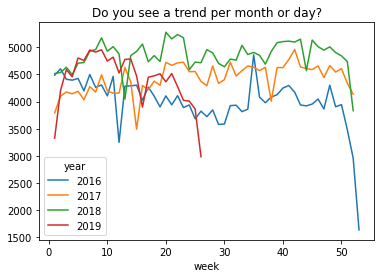

In [33]:
df.groupby([df["fecha_hechos"].dt.year.rename("year"), df["fecha_hechos"].dt.week.rename("week")]).size().unstack("year").plot(title="Do you see a trend per month or day?")
plt.show()

In [58]:
df=df[df["alcaldia_hechos"].isin(['ALVARO OBREGON','AZCAPOTZALCO','BENITO JUAREZ','COYOACAN','CUAJIMALPA DE MORELOS','CUAUHTEMOC','GUSTAVO A MADERO','IZTACALCO','IZTAPALAPA','LA MAGDALENA CONTRERAS','MIGUEL HIDALGO','MILPA ALTA','TLAHUAC','TLALPAN','VENUSTIANO CARRANZA','XOCHIMILCO'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 800207 entries, 2016-01-05 17:00:00 to 2017-04-01 10:00:00
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    800207 non-null  int64         
 1   ao_hechos             800207 non-null  float64       
 2   mes_hechos            800207 non-null  category      
 3   fecha_hechos          800207 non-null  datetime64[ns]
 4   delito                800207 non-null  category      
 5   categoria_delito      800207 non-null  category      
 6   fiscalia              800207 non-null  object        
 7   agencia               800207 non-null  object        
 8   unidad_investigacion  799985 non-null  object        
 9   colonia_hechos        776763 non-null  object        
 10  alcaldia_hechos       800207 non-null  object        
 11  fecha_inicio          800207 non-null  datetime64[ns]
 12  mes_inicio            80

In [60]:
#created a heatmap per Crimes and Cities
#df["delito"].nunique()

top_20 = df.groupby("delito").size().to_frame(name="Count").sort_values(by="Count", ascending=False)

top_20

table = df[["alcaldia_hechos", "delito"]].pivot_table(index="alcaldia_hechos", columns="delito", values="delito", aggfunc=len).fillna(0)[top_20.index[:20]]

table




delito,VIOLENCIA FAMILIAR,ROBO DE OBJETOS,ROBO A NEGOCIO SIN VIOLENCIA,FRAUDE,DENUNCIA DE HECHOS,AMENAZAS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,ROBO A CASA HABITACION SIN VIOLENCIA,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,ABUSO DE CONFIANZA,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL,DESPOJO,ROBO A NEGOCIO CON VIOLENCIA,NARCOMENUDEO POSESION SIMPLE,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION
alcaldia_hechos,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,5094.0,3091.0,3242.0,2595.0,2980.0,2464.0,1364.0,2139.0,1267.0,2139.0,1281.0,1715.0,1400.0,956.0,832.0,1076.0,711.0,863.0,497.0,531.0
AZCAPOTZALCO,3116.0,2639.0,3293.0,1691.0,1447.0,2288.0,1173.0,2416.0,1311.0,1760.0,1086.0,925.0,1281.0,765.0,675.0,661.0,687.0,566.0,269.0,471.0
BENITO JUAREZ,2832.0,4419.0,6076.0,6461.0,3309.0,2452.0,1224.0,2293.0,6030.0,2813.0,2422.0,4068.0,1483.0,2390.0,1732.0,1217.0,897.0,725.0,178.0,817.0
COYOACAN,4570.0,3870.0,3919.0,3002.0,3274.0,2583.0,1277.0,1594.0,2056.0,2475.0,1795.0,2481.0,1652.0,954.0,847.0,1118.0,737.0,612.0,668.0,671.0
CUAJIMALPA DE MORELOS,1195.0,791.0,903.0,770.0,435.0,455.0,122.0,85.0,150.0,367.0,389.0,333.0,161.0,65.0,294.0,302.0,256.0,77.0,95.0,117.0
CUAUHTEMOC,5640.0,10291.0,8095.0,11863.0,9216.0,5129.0,5432.0,4187.0,3981.0,2462.0,2139.0,3662.0,1194.0,6051.0,1891.0,1412.0,1597.0,1290.0,1900.0,1444.0
GUSTAVO A MADERO,7509.0,4278.0,5560.0,3070.0,4170.0,3548.0,3110.0,1987.0,2551.0,1781.0,2263.0,1536.0,2731.0,1425.0,1193.0,1059.0,1314.0,1354.0,1336.0,1214.0
IZTACALCO,4348.0,1919.0,1072.0,1322.0,1988.0,1633.0,1312.0,1738.0,1042.0,1164.0,984.0,562.0,942.0,961.0,551.0,579.0,509.0,640.0,229.0,474.0
IZTAPALAPA,13277.0,7115.0,8026.0,3524.0,6295.0,6069.0,6178.0,4720.0,1914.0,2390.0,2886.0,1788.0,3583.0,1746.0,1497.0,1480.0,1613.0,2106.0,2115.0,1335.0


In [62]:
table_sc_cities = table.apply(lambda x: x/sum(x), axis=0)
table_sc_crimes = table.apply(lambda x: x/sum(x), axis=1)

table_sc_cities

delito,VIOLENCIA FAMILIAR,ROBO DE OBJETOS,ROBO A NEGOCIO SIN VIOLENCIA,FRAUDE,DENUNCIA DE HECHOS,AMENAZAS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,ROBO A CASA HABITACION SIN VIOLENCIA,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,ABUSO DE CONFIANZA,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL,DESPOJO,ROBO A NEGOCIO CON VIOLENCIA,NARCOMENUDEO POSESION SIMPLE,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION
alcaldia_hechos,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,0.073819,0.059591,0.063079,0.057891,0.068328,0.066071,0.047005,0.082568,0.049827,0.089953,0.058148,0.078920,0.071586,0.052124,0.064446,0.085764,0.057371,0.076015,0.050406,0.054400
AZCAPOTZALCO,0.045155,0.050877,0.064071,0.037724,0.033178,0.061352,0.040423,0.093260,0.051557,0.074015,0.049296,0.042566,0.065501,0.041710,0.052285,0.052686,0.055435,0.049855,0.027282,0.048253
BENITO JUAREZ,0.041039,0.085194,0.118219,0.144135,0.075872,0.065750,0.042181,0.088512,0.237140,0.118298,0.109941,0.187198,0.075830,0.130309,0.134160,0.097003,0.072380,0.063860,0.018053,0.083700
COYOACAN,0.066225,0.074610,0.076251,0.066970,0.075069,0.069262,0.044007,0.061530,0.080856,0.104083,0.081480,0.114169,0.084471,0.052015,0.065608,0.089112,0.059469,0.053906,0.067748,0.068743
CUAJIMALPA DE MORELOS,0.017317,0.015250,0.017569,0.017178,0.009974,0.012201,0.004204,0.003281,0.005899,0.015434,0.017658,0.015324,0.008232,0.003544,0.022773,0.024071,0.020657,0.006782,0.009635,0.011986
CUAUHTEMOC,0.081731,0.198400,0.157503,0.264646,0.211313,0.137533,0.187194,0.161623,0.156560,0.103537,0.097095,0.168515,0.061052,0.329917,0.146476,0.112546,0.128863,0.113626,0.192698,0.147936
GUSTAVO A MADERO,0.108815,0.082475,0.108180,0.068487,0.095614,0.095138,0.107175,0.076700,0.100322,0.074898,0.102724,0.070682,0.139643,0.077695,0.092409,0.084409,0.106028,0.119264,0.135497,0.124373
IZTACALCO,0.063008,0.036996,0.020858,0.029492,0.045583,0.043788,0.045213,0.067089,0.040978,0.048951,0.044666,0.025862,0.048167,0.052396,0.042680,0.046150,0.041072,0.056373,0.023225,0.048561
IZTAPALAPA,0.192401,0.137170,0.156160,0.078615,0.144338,0.162738,0.212902,0.182197,0.075271,0.100509,0.131003,0.082279,0.183208,0.095197,0.115957,0.117966,0.130154,0.185502,0.214503,0.136769


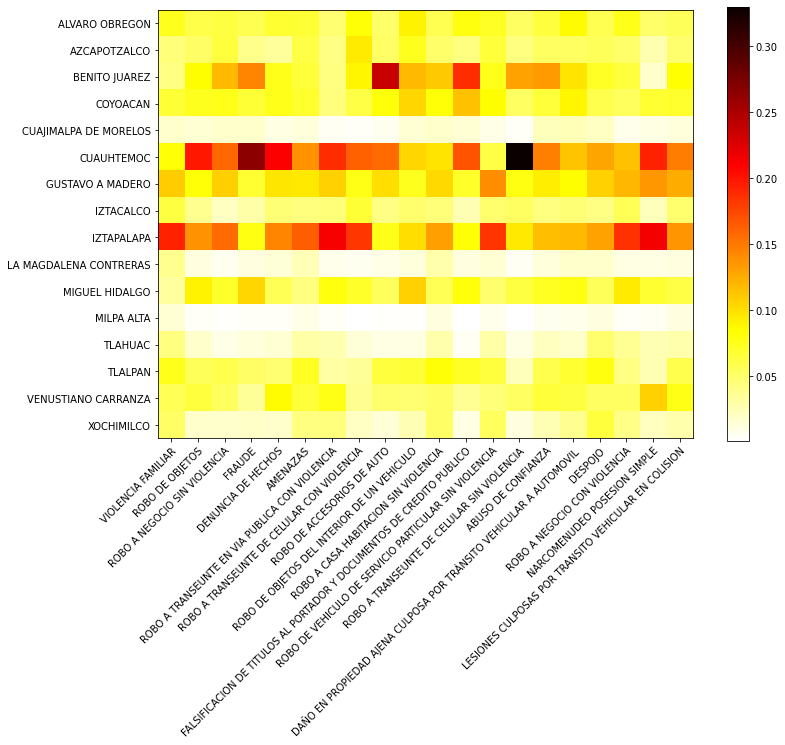

In [64]:
# created a heatmap per Crimes and Cities with matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(table_sc_cities, cmap="hot_r")
ax.set_xticks(np.arange(table_sc_cities.shape[1]))
ax.set_yticks(np.arange(table_sc_cities.shape[0]))
ax.set_xticklabels(table_sc_cities.columns.to_list())
ax.set_yticklabels(table_sc_cities.index.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.colorbar(im)
plt.show()

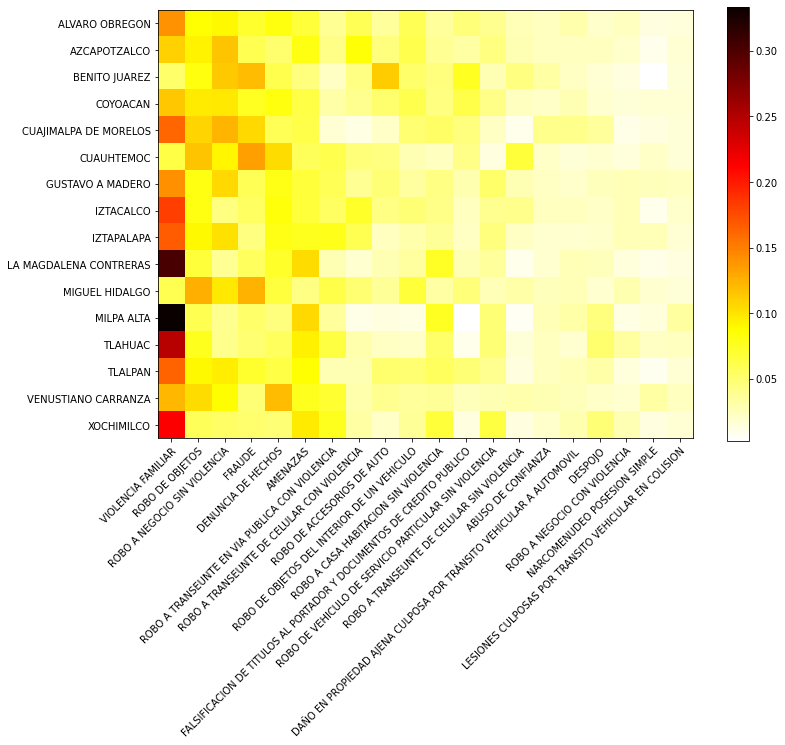

In [65]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(table_sc_crimes, cmap="hot_r")
ax.set_xticks(np.arange(table_sc_crimes.shape[1]))
ax.set_yticks(np.arange(table_sc_crimes.shape[0]))
ax.set_xticklabels(table_sc_crimes.columns.to_list())
ax.set_yticklabels(table_sc_crimes.index.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.colorbar(im)
plt.show()

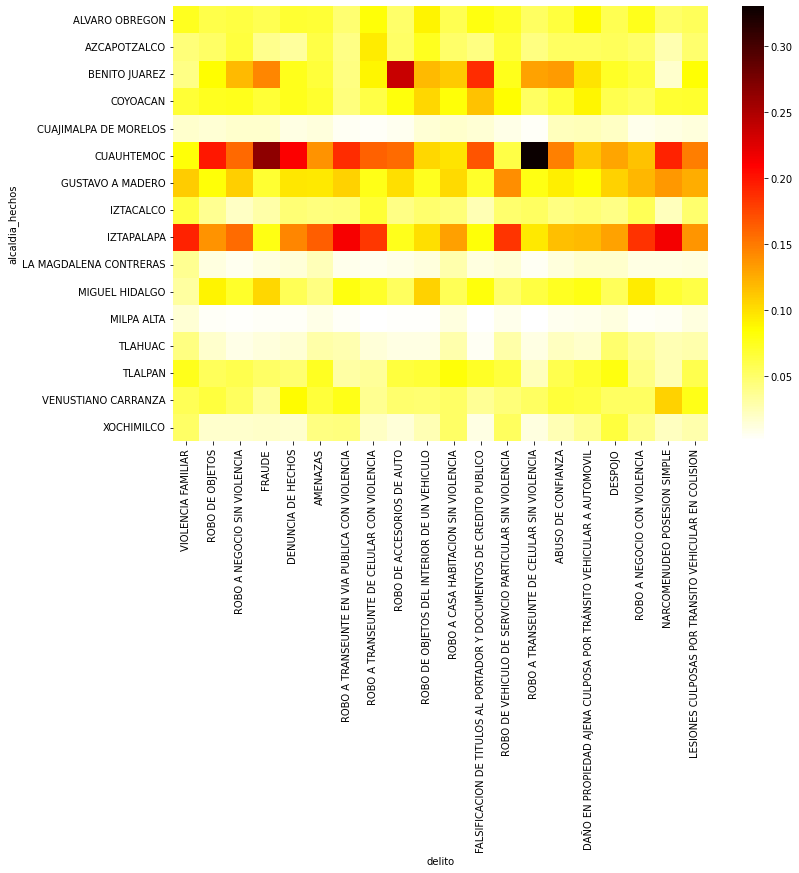

In [66]:
# created a heatmap per Crimes and Cities with seaborn
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(table_sc_cities, cmap="hot_r")
ax.plot()
plt.show()

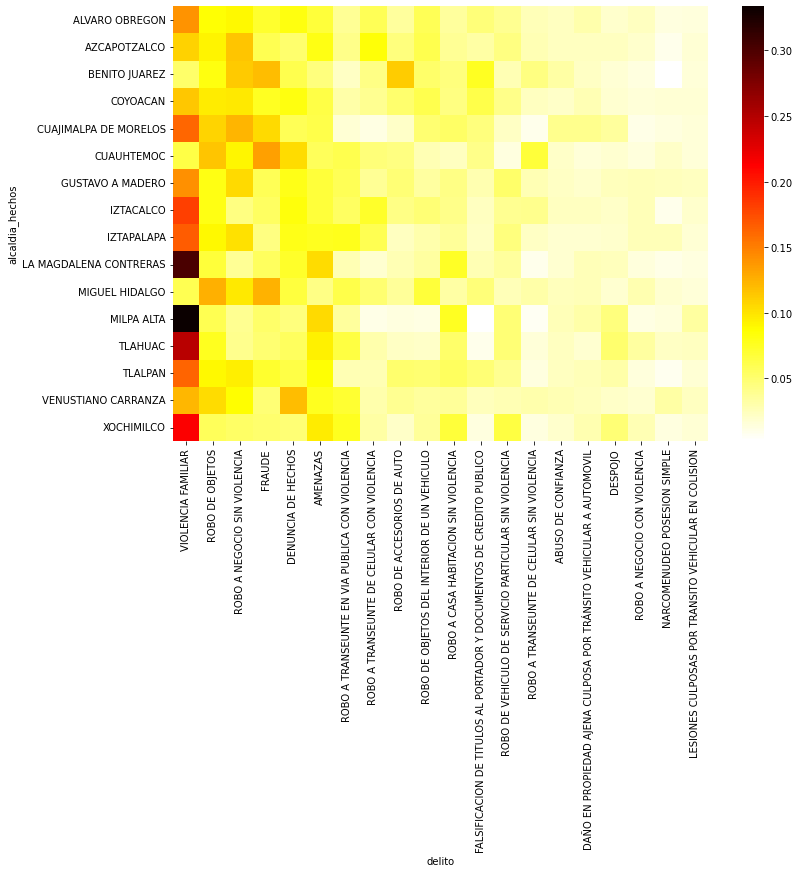

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(table_sc_crimes, cmap="hot_r")
ax.plot()
plt.show()

In [72]:
# created a heatmap per Crimes and Cities with plotly.express
fig = px.imshow(table_sc_cities.T, color_continuous_scale="hot_r", aspect="auto")
fig.update_xaxes(tickangle=-45)
fig.show()


In [73]:
fig = px.imshow(table_sc_crimes.T, color_continuous_scale="hot_r", aspect="auto")
fig.update_xaxes(tickangle=-45)
fig.show()


In [88]:
# created a map for phone robbery with violence with folium

crime='ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA'

df_rob = df[df['delito'] == crime][['delito', 'longitud', 'latitud', 'fecha_hechos']]

df_rob = df_rob[df_rob["longitud"].notna()]

df_rob = df_rob.reset_index(drop=True)

df_rob = df_rob.sort_values(by="fecha_hechos")

fin = pd.to_datetime("2016-03-31")

df_rob["fecha_hechos"] = pd.to_datetime(df_rob["fecha_hechos"], format="%Y-%m-%d")

df_rob = df_rob[df_rob["fecha_hechos"] <= fin]

#df_rob["fecha_hechos"] = pd.to_datetime(df_rob["fecha_hechos"]).date()

df_rob

,delito,longitud,latitud,fecha_hechos
11682,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.097333,19.240091,2016-01-01 01:45:00
11654,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.066642,19.350896,2016-01-01 10:00:00
19022,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.067514,19.450755,2016-01-01 12:37:46
2150,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.234479,19.370958,2016-01-01 21:30:00
16503,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.125703,19.292970,2016-01-01 21:55:00
...,...,...,...,...
16036,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.112115,19.375599,2016-03-30 17:20:00
15932,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.175181,19.477098,2016-03-30 19:15:00
19754,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.011282,19.378033,2016-03-30 19:30:00
7715,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.113420,19.378618,2016-03-30 22:00:00


In [89]:
map = folium.Map()

for i in range(len(df_rob)):
    lat = df_rob["latitud"].to_list()[i]
    lon = df_rob["longitud"].to_list()[i]
    folium.Marker(location=[lat, lon], icon=folium.Icon(color="red", icon="check", prefix="fa")).add_to(map)

map

In [91]:
map = folium.Map()

mc = MarkerCluster().add_to(map)

for i in range(len(df_rob)):
    lat = df_rob["latitud"].to_list()[i]
    lon = df_rob["longitud"].to_list()[i]
    folium.Marker(location=[lat, lon], icon=folium.Icon(color="red", icon="check", prefix="fa")).add_to(mc)

map

In [98]:
df_rob['fecha_hechos'] = pd.to_datetime(df_rob['fecha_hechos']).dt.date
df_rob["fecha_hechos_str"] = df_rob["fecha_hechos"].apply(lambda x : str(x))
df_rob

,delito,longitud,latitud,fecha_hechos,fecha_hechos_str
11682,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.097333,19.240091,2016-01-01,2016-01-01
11654,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.066642,19.350896,2016-01-01,2016-01-01
19022,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.067514,19.450755,2016-01-01,2016-01-01
2150,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.234479,19.370958,2016-01-01,2016-01-01
16503,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.125703,19.292970,2016-01-01,2016-01-01
...,...,...,...,...,...
16036,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.112115,19.375599,2016-03-30,2016-03-30
15932,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.175181,19.477098,2016-03-30,2016-03-30
19754,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.011282,19.378033,2016-03-30,2016-03-30
7715,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,-99.113420,19.378618,2016-03-30,2016-03-30


In [99]:
# created a map for phone robbery with violence with plotly.express
fig = px.scatter_mapbox(df_rob, lat="latitud", lon="longitud", mapbox_style="open-street-map", animation_frame="fecha_hechos_str", width=700, height=700)
fig.show()